**Table of contents**<a id='toc0_'></a>    
- [Laboratorio Programación Diferencial](#toc1_)    
  - [Objetivos](#toc1_1_)    
  - [Ejercicios](#toc1_2_)    
    - [Ejercicio 1. Construcción de la puerta Toffoli a partir de las puertas U3 y CNOT.](#toc1_2_1_)    
      - [Solución](#toc1_2_1_1_)    
    - [Ejericio 2. Superposición de todos los estados básicos menos uno.](#toc1_2_2_)    
      - [Solución](#toc1_2_2_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Laboratorio Programación Diferencial](#toc0_)
## <a id='toc1_1_'></a>[Objetivos](#toc0_)

En esta sesión de laboratorio vamos a poner en práctica todos los conceptos que hemos aprendido sobre la programación cuántica diferencial.

## <a id='toc1_2_'></a>[Ejercicios](#toc0_)

Trabajaremos con dos ejercicios en los que aplicar dicha estrategia:

### <a id='toc1_2_1_'></a>[Ejercicio 1. Construcción de la puerta Toffoli a partir de las puertas U3 y CNOT.](#toc0_)

La universalidad del computador de puertas establece que podemos construir cualquier función a partir de las puertas disponibles actualmente. En un primer momento se vio que con la puerta Toffoli, la puerta U3 y CNOTs la universalidad quedaba probada, sin embargo, enseguida se comprobó que se podría construir la puerta Toffoli a partir de las otras dos. Nuestro primer objetivo será encontrar la equivalencia a través de estas puertas. No obstante, por facilitar el trabajo, supondremos que ya conocemos algunas de ellas, tal y como podemos ver en la imagen:

![Toffoli](circuit.jpg)

Crear un programa capaz de calcular cuáles son las puertas que debemos colocar en las interrogaciones amarillas para conseguir la equivalencia de ese circuito con la puerta Toffoli. Existen varias formas de hacerlo, algunas mucho más fáciles que otras.

#### <a id='toc1_2_1_1_'></a>[Solución](#toc0_)

Para implementar dicho programa lo primero que haremos será importar las librerías necesarias para su ejecución.

In [2]:
import pennylane as qml
from pennylane import numpy as np

# Definir el dispositivo
dev = qml.device('default.qubit', wires=3)

Una vez importadas las librerías podemos empezar a trabajar en la solución. Lo primero que haremos será implementar un circuito en Pennylane que nos muestre el funcionamiento de la puerta Toffoli. 

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.avconv_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.avconv_path rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.html_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The keymap.all_axes rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/opt/homebrew/Caskroom/m

tensor([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j], requires_grad=True)

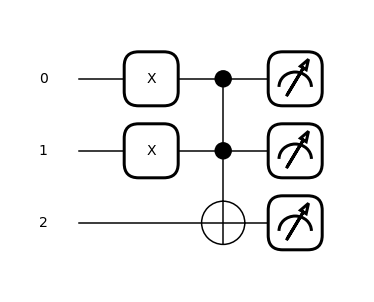

In [3]:
# Definir el circuito de la puerta Toffoli
@qml.qnode(dev)
def toffoli_circuit():
    qml.PauliX(wires=0)
    qml.PauliX(wires=1)
    
    qml.Toffoli(wires=[0, 1, 2])
    return qml.state()


# Dibujar el circuito
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(toffoli_circuit)()

# Estado final del circuito
result = toffoli_circuit()
result

Vemos que cuando el primer y el segundo qubit están en estado 1, el tercer qubit cambia de estado, obteniendo $|111\rangle$. Nuestro objetivo será implementar un circuito con una funcionalidad similar a través de las puertas U3 y CNOT.

Primero implementaremos el circuito de la imagen, parametrizando las puertas que contienen interrogaciones como U3 parametrizadas.

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.avconv_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.avconv_path rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.html_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The keymap.all_axes rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/opt/homebrew/Caskroom/m

Parámetros iniciales:
θ1: 0.12767570324334254π, φ1: -0.33516553668714866π, λ1: 0.7381830789365806π
θ2: -2.2901865263005328π, φ2: 0.9143343859548074π, λ2: -0.28033025274710344π


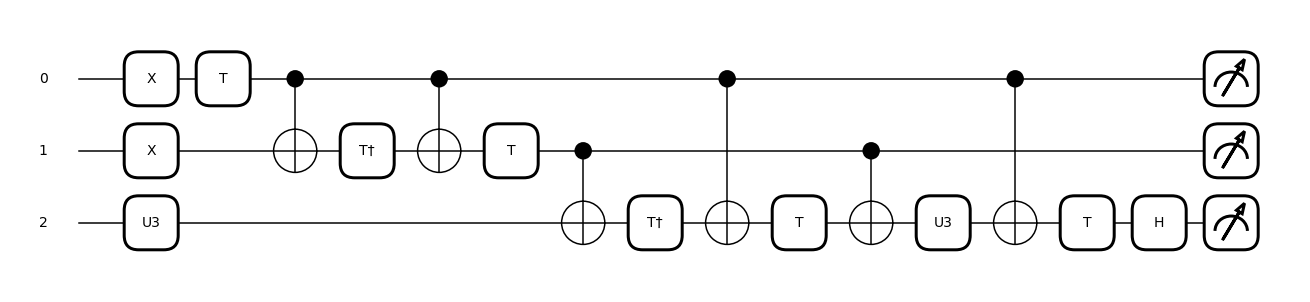

In [4]:
# Definir el circuito parametrizado
@qml.qnode(dev)
def parametrized_circuit(params):
    # Usamos las Pauli-X para inicializar los qubits a |1>
    qml.PauliX(wires=0)
    qml.PauliX(wires=1)


    qml.T(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.adjoint(qml.T)(wires=1)
    qml.CNOT(wires=[0, 1])
    qml.T(wires=1)
    qml.U3(params[3], params[4], params[5], wires=2)
    qml.CNOT(wires=[1, 2])
    qml.adjoint(qml.T)(wires=2)
    qml.CNOT(wires=[0, 2])
    qml.T(wires=2)
    qml.CNOT(wires=[1, 2])
    qml.U3(params[0], params[1], params[2], wires=2)
    qml.CNOT(wires=[0, 2])
    qml.T(wires=2)
    qml.Hadamard(wires=2)
    return qml.state()


# Inicializar los parámetros
init_params = np.random.normal(0, np.pi, 6)
# Dibujar el circuito
fig, ax = qml.draw_mpl(parametrized_circuit)(init_params)

print("Parámetros iniciales:")
print(f"θ1: {init_params[0]/np.pi}π, φ1: {init_params[1]/np.pi}π, λ1: {init_params[2]/np.pi}π")
print(f"θ2: {init_params[3]/np.pi}π, φ2: {init_params[4]/np.pi}π, λ2: {init_params[5]/np.pi}π")

Veamos el resultado que obtenemos de este circuito antes de la optimización de sus parámetros.

In [5]:
# Obtener el estado del circuito Toffoli
parametrized_state = parametrized_circuit(init_params)
parametrized_state

tensor([0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.        +0.j        ,
        0.45736207-0.77211747j, 0.05464667-0.43779937j], requires_grad=True)

Podemos observar que el resultado no coincide con lo esperado. Es por eso que optimizaremos el valor de dichos parámetros para que se ajusten de acuerdo al comportamiento que esperamos del circuito.

Para ello debemos definir una función de coste capaz de evaluar la diferencia entre el resultado esperado y el obtenido. En este caso, la función de coste será la siguiente:

$$ cost = 1 - |\langle EstadoToffoli|EstadoParametrizado\rangle|^2 $$

De tal forma que cuando ambos estados sean igfuales, el coste será 0, y cuando sean perpendiculares, el coste será 1.

In [8]:
# Definir la función de coste para la optimización
def cost(params):
    parametrized_state = parametrized_circuit(params)
    fidelity = np.abs(np.dot(np.conj(result), parametrized_state))**2
    return 1 - fidelity

Definida la función de coste podemos utlizar un algoritmo de descenso por gradiente para optimizar los parámetros de las puertas U3.

In [9]:
# Realizar la optimización
opt = qml.GradientDescentOptimizer(stepsize=0.1)
params = init_params
num_steps = 260

# Evaluación del proceso de optimización
for i in range(num_steps):
    params = opt.step(cost, params)
    if (i + 1) % 20 == 0:
        print(f"Paso {i+1}: Coste = {cost(params)}")

# Resultados de la optimización
print("Parámetros óptimos:")
print(f"θ1: {params[0]/np.pi}π, φ1: {params[1]/np.pi}π, λ1: {params[2]/np.pi}π")
print(f"θ2: {params[3]/np.pi}π, φ2: {params[4]/np.pi}π, λ2: {params[5]/np.pi}π")

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:698: ComplexWarning: Casting complex values to real discards the imaginary part
  onp.add.at(A, idx, x)


Paso 20: Coste = 0.1414762968268951
Paso 40: Coste = 0.0035903620300954397
Paso 60: Coste = 0.00010670317923533457
Paso 80: Coste = 3.290812386813613e-06
Paso 100: Coste = 1.0168361586071484e-07
Paso 120: Coste = 3.141860549504827e-09
Paso 140: Coste = 9.707634696098921e-11
Paso 160: Coste = 2.999156478722398e-12
Paso 180: Coste = 9.259260025373806e-14
Paso 200: Coste = 3.1086244689504383e-15
Paso 220: Coste = 2.220446049250313e-16
Paso 240: Coste = 0.0
Paso 260: Coste = 0.0
Parámetros óptimos:
θ1: -0.07237904634781897π, φ1: -0.5520658195453487π, λ1: 0.4753184260471688π
θ2: -2.44134350309226π, φ2: 1.1771990388442202π, λ2: -0.28033025274710344π


Una vez optimizados los parámetros, comprobaremos como se comporta el circuito con los nuevos valores, para ello calcularemos el valor esperado de $Z$ en los distintos qubits para la Tooffoli y para el circuito parametrizado.

In [ ]:
# Definir el circuito parametrizado
@qml.qnode(dev)
def parametrized_circuit(params):
    # Usamos las Pauli-X para inicializar los qubits a |1>
    qml.PauliX(wires=0)
    qml.PauliX(wires=1)


    qml.T(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.adjoint(qml.T)(wires=1)
    qml.CNOT(wires=[0, 1])
    qml.T(wires=1)
    qml.U3(params[3], params[4], params[5], wires=2)
    qml.CNOT(wires=[1, 2])
    qml.adjoint(qml.T)(wires=2)
    qml.CNOT(wires=[0, 2])
    qml.T(wires=2)
    qml.CNOT(wires=[1, 2])
    qml.U3(params[0], params[1], params[2], wires=2)
    qml.CNOT(wires=[0, 2])
    qml.T(wires=2)
    qml.Hadamard(wires=2)
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(3)]

# Definir el circuito de la puerta Toffoli
@qml.qnode(dev)
def toffoli_circuit():
    qml.PauliX(wires=0)
    qml.PauliX(wires=1)
    
    qml.Toffoli(wires=[0, 1, 2])[qml.expval(qml.PauliZ(wires=i)) for i in range(3)]
    return 


# Representamos el valor esperado en función de los parámetros optimizados
results = parametrized_circuit(params)
print(f"Valor esperado de Z para cada qubit después de la puerta Toffoli implementada:")

for i in range(3):
    print(f"Qubit {i}: {results[i]}")

# Representamos el valor esperado en la puerta Toffoli original
results_toffoli = toffoli_circuit()
print(f"Valor esperado de Z para cada qubit después de la puerta Toffoli original:")

for i in range(3):
    print(f"Qubit {i}: {results_toffoli[i]}")

Valor esperado de Z para cada qubit después de la puerta Toffoli implementada:
Qubit 0: -0.9999999999999996
Qubit 1: -0.9999999999999996
Qubit 2: -0.9999999999999951
Valor esperado de Z para cada qubit después de la puerta Toffoli original:
Qubit 0: -1.0
Qubit 1: -1.0
Qubit 2: -1.0


Podemos observar que los resultados obtenidos por la Toffoli original y niestro circuito parametrizado son prácticamente iguales, por lo que podemos afirmar que hemos conseguido la equivalencia entre ambos circuitos.

### <a id='toc1_2_2_'></a>[Ejericio 2. Superposición de todos los estados básicos menos uno.](#toc0_)

Para este ejercicio trabajaremos con 3 qubits. Es conocido que, si queremos una superposición equiprobable de todos los estados básicos, deberemos aplicar una puerta Hadamard sobre cada uno de estos. La probabilidad con la que veremos cada estado en esta situación será un $12’5$% (pues tenemos 8 estados). Para este ejercicio se pide encontrar un circuito capaz de generar o conseguir una buena aproximación de la superposición de todos los estados menos del |000 >. Es decir, queremos conseguir el estado:

$$ |\psi \rangle = \frac{1}{\sqrt7}  \sum_{i=1}^7 |i\rangle$$ 

Para ello partiremos del estado máximamente entrelazado aplicando puertas de Haddamard a los qubits en el estado inicial $|000\rangle$ . De este estado máximamente entrelazado el objetivo será eliminar el estado $|000\rangle$.

#### <a id='toc1_2_2_1_'></a>[Solución](#toc0_)

Utilizaremos un qubit ancilla para ayudarnos a obtener el resultado buscado. Este qubit ancilla nos permitirá "marcar" el estado $|000\rangle$ para poder eliminarlo del estado final. 

Partiremos del estado

$$ |\psi \rangle = \frac{1}{\sqrt8}  \sum_{i=0}^7 |i\rangle |0\rangle$$

Este estado lo conseguiremos aplicando Hadamard a los tres qubits. 

A continuación, aplicaremos una puerta $X$ a los qubits de tal forma que el estado $|000\rangle$ se convierta en $|111\rangle$.

Una vez tenemos el estado buscado en $|111\rangle$ aplicaremos una puerta $X$ sobre el qubit ancilla controlada por el resto de qubits. 

En este punto el estado será el siguiente:

$$ |\psi \rangle = \frac{1}{\sqrt8}( \sum_{i=0}^6 |i\rangle |0\rangle + |111\rangle |1\rangle)$$

De tal forma que el estado $|111\rangle$ está asociado al estado $|1\rangle$ del qubit ancilla.

Si aplicamos ahora un apuerta $X$ a los qubits, tendremos marcado el estado $|000\rangle$ con el estado $|1\rangle$ del qubit ancilla.

$$ |\psi \rangle = \frac{1}{\sqrt8}( \sum_{i=0}^6 |i\rangle |0\rangle + |000\rangle |1\rangle)$$

De tal forma que si medimos ahora el qubit ancilla y obtenemos un 0, podemos afirmar que el estado $|000\rangle$ no está en el estado final. Esto ocurre con una probabilidad de $7/8$, por lo que si no obtenemos el resultado esperado, podedmos repetir el proceso hasta obtenerlo.

Descrito el proceso que seguiremos, vamos a implementar el circuito en Pennylane.

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.avconv_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.avconv_path rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.html_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The keymap.all_axes rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/opt/homebrew/Caskroom/m

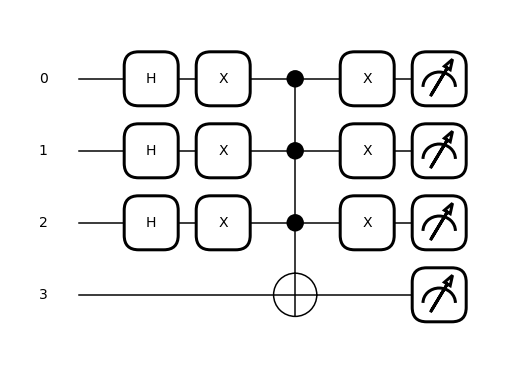

In [99]:
# Definir el dispositivo
dev = qml.device('default.qubit', wires=4, shots=1000)

# Definir el circuito para generar la superposición deseada
@qml.qnode(dev)
def superposition_circuit():
    # Aplicar Hadamard a cada qubit
    for i in range(3):
        qml.Hadamard(wires=i)
        qml.PauliX(wires=i)
    

    # Aplicamos multi-controlled not sobre el qubit ancilla 3
    qml.MultiControlledX(wires=[0, 1, 2, 3])

    for i in range(3):
        qml.PauliX(wires=i)

    

    return qml.probs(wires=[0,1,2]), qml.probs(wires=[3])

# Dibujar el circuito
fig, ax = qml.draw_mpl(superposition_circuit)()


Comprobaremos ahora si efectivamente medimos el estado 0 en el qubit ancilla con una probabilidad de $7/8$.

In [97]:
# Probabilidades de los qubits
print("Probabilidades de los qubits:")
for i, prob in enumerate(ancilla):
    print(f"|{i}>: {prob:.4f}")

Probabilidades de los qubits:
|0>: 0.8980
|1>: 0.1020


Por lo que podemos confirmar que obtendremos el estado deseado con una alta probabilidad. Además, al medir el qubit ancilla podemos saber si el estado $|000\rangle$ está presente en el estado final y repetir el proceso si no es así.